Import the package and some example data:

In [1]:
import texpro as tp
import seaborn as sns

iris = sns.load_dataset('iris')

Initialise the TeXpro document directory:

In [2]:
tp.config.doc_path = 'texexample/'
tp.config.make_folders()

Take a first look at the data and save the graph for use in LaTeX:

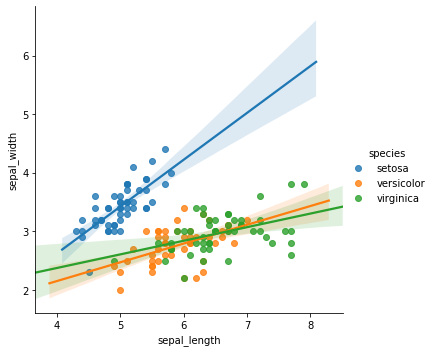

In [3]:
plot = tp.Plot(sns.lmplot(x='sepal_length', y='sepal_width', hue='species', data=iris))
tp.TexFigure(plot, 'sepal_plot').save()

Looks like there is a relationship between sepal length and width.  Let’s test the relationship more formally using the following regression:

In [4]:
tp.TexEquation(r'sepal\_width_i = \alpha_i + \beta_i sepal\_length_i + \epsilon_i', 'sepal_reg').save()

In [5]:
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
est1 = smf.ols('sepal_width ~ 1 + sepal_length', iris).fit()

tp.StargazerTable(Stargazer([est1]), 'sepal_reg').save()

TeXpro creates all the required LaTeX files and places them in sensible folders:

In [6]:
print(tp.config.file_tree)


texexample
├── eq
│   └── sepal_reg.tex
├── fig
│   └── sepal_plot.tex
├── img
│   └── sepal_plot.pdf
└── tab
    └── sepal_reg.tex
